Hypothesis Testing
Answer the following Questions:

    Q1. Do smokers have higher insurance charges than non-smokers?
    Q2. Are men more likely to smoke than women?
    Q3. Do different regions have different charges, on average?

For each question, make sure to:

    State your Null Hypothesis and Alternative Hypothesis
    Select the correct test according to the data type and number of samples
    Test the assumptions of your selected test.
    Execute the selected test, or the alternative test (if you do not meet the assumptions)
    Interpret your p-value and reject or fail to reject your null hypothesis
    Show a supporting visualization that helps display the result



In [4]:
import pandas as pd
import numpy as np

In [5]:
# Read a CSV file
df = pd.read_csv('insurance - insurance.csv')

# Display the first few rows of the DataFrame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
Q1. Do smokers have higher insurance charges than non-smokers?

- Null hypothesis (H0): There is no difference in insurance charges between smokers and non-smokers. 
- Alternative hypothesis (Ha): Smokers have higher insurance charges than non-smokers

<Axes: xlabel='smoker', ylabel='charges'>

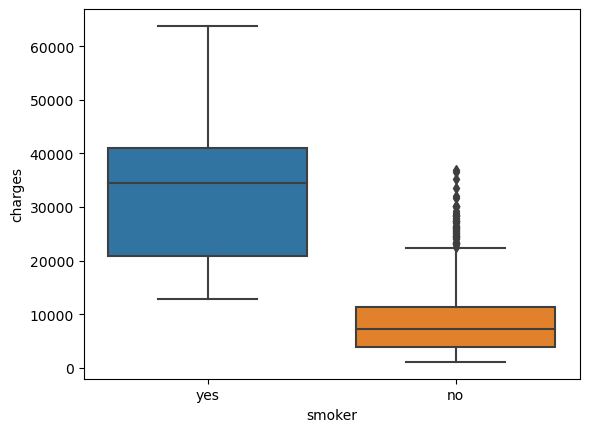

In [6]:
#Checking for outliers
import seaborn as sns
sns.boxplot(data=df, x='smoker', y='charges')

In [8]:
# Filtering out
smoker = df.loc[df['smoker'] == "yes"]
no_smoker = df.loc[df['smoker']== "no" ]

In [9]:
# point of interest
smoker_charges = smoker['charges']
no_smoker_charges = no_smoker['charges']

In [13]:
import scipy.stats as stats
# test the smoker group for normality
smoker_charges = stats.normaltest(smoker_charges)
smoker_charges


NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [8]:
# Independent t-test
result = stats.ttest_ind(smoker_charges, no_smoker_charges, equal_var = False)
result

TtestResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103, df=311.85112492054634)

In [14]:
# Test for equal variance
result = stats.levene(smoker_charges, no_smoker_charges)
result



LeveneResult(statistic=2.1546152198367587, pvalue=0.1424375860306192)

- A p-value less than .05 tells us we can reject the null hypothesis.


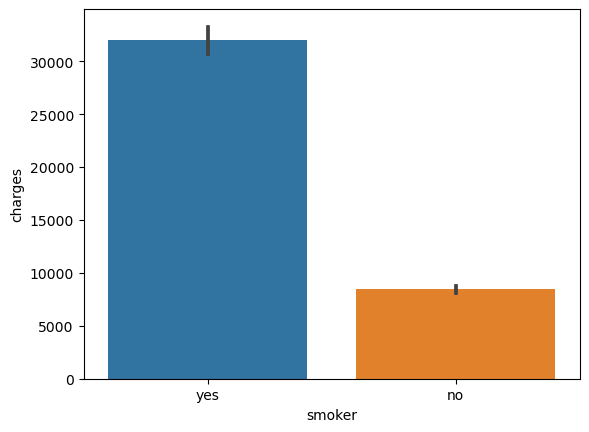

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(data=df, x='smoker', y="charges")

 Q2. Are men more likely to smoke than women?

- Null hypothesis (H0): There is no difference in smoking rates between men and women.
  Alternative hypothesis (Ha): Men have higher smoking rates than women.


In [10]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table



smoker,no,yes
sex,,
female,547,115
male,517,159


In [15]:
# Run the Test and Save the Output
results = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = results #this labels the results
print(p)
p<.05



0.006548143503580696


True

- A p-value less than .05 tells us we can reject the null hypothesis.


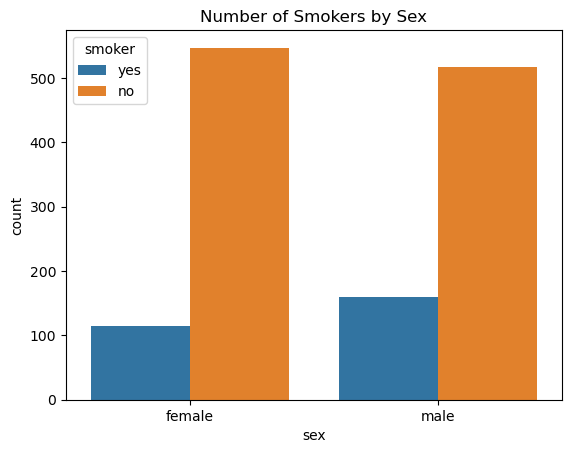

In [25]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");



In [ ]:
 Q3. Do different regions have different charges, on average?

- Null hypothesis (H0): There is no difference in average charges between regions.
  Alternative hypothesis (Ha): Average charges differ between regions.


In [27]:
charges = df['charges']
region = df['region']

In [29]:
#testing for outliers
zscores_f = stats.zscore(charges)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)


7

In [31]:
# normal test charges
result_m = stats.normaltest(charges)
result_m


NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)

In [34]:
charges = charges[(np.abs(stats.zscore(charges)) < 3)]


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1322, dtype: float64

In [38]:
# Perform Shapiro-Wilk test
shapiro_results = shapiro(charges)
shapiro_results

ShapiroResult(statistic=0.8206338286399841, pvalue=4.910881274371761e-36)

In [26]:
# Initialize an empty dictionary to store groups
groups = {}

# Loop through unique categories in the 'region' column of your DataFrame
for region_category in df['region'].unique():
    # Create a series containing 'charges' data for the current region
    charges_data = df.loc[df['region'] == region_category, 'charges'].copy()
    
    # Store the charges data into the dictionary with the region_category as the key
    groups[region_category] = charges_data

# Print the keys of the groups dictionary to see the unique regions
print(groups.keys())


dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])


In [27]:
import scipy.stats as stats

# Pass the values from the 'groups' dictionary to stats.levene using the * operator
result = stats.levene(*groups.values())

# Print the result or perform further analysis
print(result)

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)


- A p-value less than .05 tells us we can reject the null hypothesis.


In [28]:
import scipy.stats as stats

# Perform a one-way ANOVA test using the * operator to pass group values
anova_result = stats.f_oneway(*groups.values())

# Display the result of the one-way ANOVA test
print("Result of the one-way ANOVA test:")
print(anova_result)


Result of the one-way ANOVA test:
F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)


In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Extract the 'charges' values and 'region' labels
charges_values = df['charges']
region_labels = df['region']

# Perform Tukey's multiple comparison test
tukeys_results = pairwise_tukeyhsd(charges_values, region_labels)

# Display the summary of Tukey's test results
print("Summary of Tukey's Multiple Comparison Test:")
print(tukeys_results.summary())

Summary of Tukey's Multiple Comparison Test:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


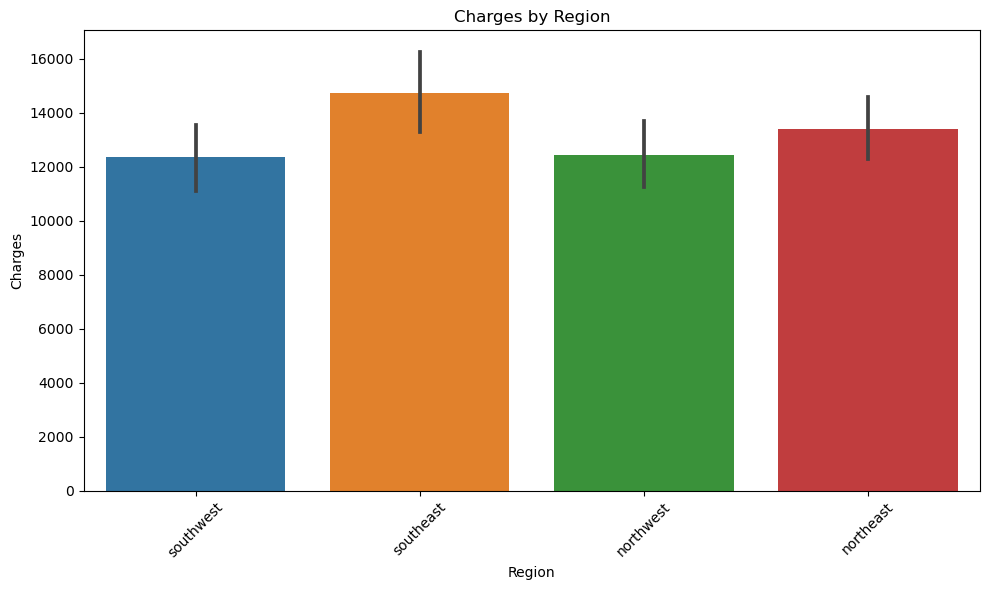

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'region' and 'charges'

# Create a bar plot to visualize charges by region
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='region', y='charges')
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()
